In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


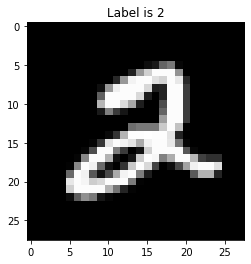

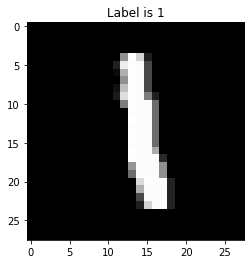

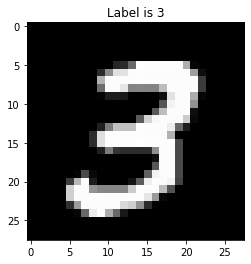

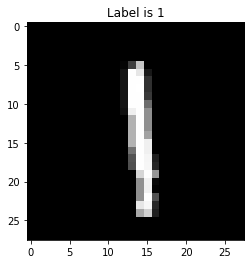

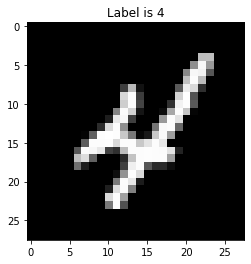

In [4]:
#print(train_images[0])}
%matplotlib inline 
import matplotlib.pyplot as plt
for index in range(5, 10):
    plt.imshow(train_images[index], cmap="gray")
    plt.title("Label is " + str(train_labels[index]))
    plt.show()
    plt.close()

In [5]:
from tensorflow.keras import models,layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))

#for index in range(1, 20):
#    model.add(layers.Dense(256, activation="relu"))

#model.add(layers.Dense(5, activation="relu"))
#model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

W0723 14:43:30.894971 4493342144 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train = train_images.astype("float32") / 255.0 # normalize data to [0.0, 1.0]
x_test = test_images.astype("float32") / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


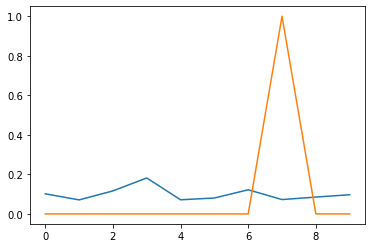

In [7]:
prediction = model.predict(x_test[0:1])
plt.plot(prediction[0])
plt.plot(y_test[0])

In [8]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2592 - acc: 0.9243
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.1043 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0678 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0500 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0379 - acc: 0.9883


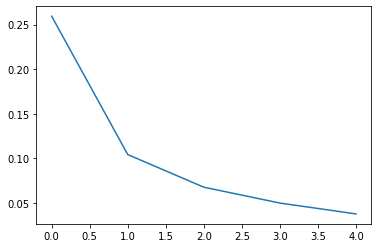

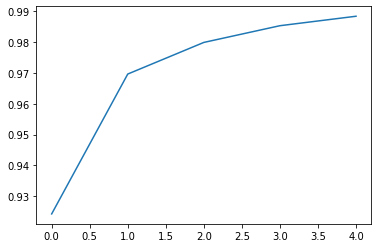

In [9]:
plt.plot(history.history["loss"])
plt.show()
plt.close()

plt.plot(history.history["acc"])
plt.show()
plt.close()

In [10]:
loss, acc = model.evaluate(x_test, y_test)
loss, acc = model.evaluate(x_train, y_train)

60000/60000 [==============================] - 3s 44us/sample - loss: 0.0261 - acc: 0.99250s - loss: 0.0262 - acc: 0.99


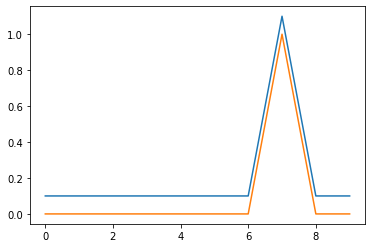

In [11]:
prediction = model.predict(x_test[0:1])
plt.plot(y_test[0] + 0.1)
plt.plot(prediction[0])